# **Project 1**
### **The Problem**

    Raging on for well over a year now, the official war starting with the Russian invasion of Ukraine shows little signs of stopping. While Ukraine seems to be gaining footholds in lost regions and making good efforts at staving off the Russian attack, one of the realities of war is that lives will be lost. This project will focus on providing insight to factors that may have affected the outcomes of historical battles, in hopes that this knowledge can be applied to reduce casualties in the Ukraine-Russia conflict. This topic particularly interests me because I spent four years in the Marine Corps as an infantryman and practiced with decision making and how to make decisions in a manner that would provide you the best chances of winning a battle.

In [1]:
#Importing packages we will be using
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt

### **The Data**

Data used for this project was found on Kaggle and is a collection of datasets from battles ranging from 1600 to 1973. Features within these datasets include the names of battles, participants, weather/terrain conditions, as well as many more. The data originated from the US Army Concept Analysis Agency.

Link to dataset: https://www.kaggle.com/datasets/residentmario/database-of-battles?select=battles.csv


In [2]:
#Reading in the database to a dataframe and viewing first 5 rows.
battles_df = pd.read_csv('battles.csv')
battles_df.head(5)

,isqno,war,name,locn,campgn,postype,post1,post2,front,depth,...,is_hero,war2,war3,war4,war4_theater,dbpedia,cow_warno,cow_warname,war_initiator,parent
0,1,NETHERLAND'S WAR OF INDEPENDENCE,NIEUPORT,SPANISH FLANDERS,NIEUPORT 1600,0,HD,NaN,0.0,0.0,...,1,NETHERLAND'S WAR OF INDEPENDENCE,NETHERLAND'S WAR OF INDEPENDENCE,Eighty Years War of 1568-1648,NaN,http://dbpedia.org/resource/Battle_of_Nieuwpoort,NaN,NaN,0,NaN
1,2,THIRTY YEAR'S WAR,WHITE MOUNTAIN,BOHEMIA,BOHEMIA 1620,1,HD,PD,1.0,0.0,...,1,THIRTY YEAR'S WAR,THIRTY YEAR'S WAR,Thirty Years' War of 1618-1648,NaN,http://dbpedia.org/resource/Battle_of_White_Mo...,NaN,NaN,0,NaN
2,3,THIRTY YEAR'S WAR,WIMPFEN,PALATINATE,PALATINATE 1622,0,HD,NaN,0.0,0.0,...,1,THIRTY YEAR'S WAR,THIRTY YEAR'S WAR,Thirty Years' War of 1618-1648,NaN,http://dbpedia.org/resource/Battle_of_Wimpfen,NaN,NaN,0,NaN
3,4,THIRTY YEAR'S WAR,DESSAU BRIDGE,ANHALT,DANISH INVASION OF GERMANY 1625-26,0,PD,NaN,0.0,0.0,...,1,THIRTY YEAR'S WAR,THIRTY YEAR'S WAR,Thirty Years' War of 1618-1648,NaN,http://dbpedia.org/resource/Battle_of_Dessau_B...,NaN,NaN,1,NaN
4,5,THIRTY YEAR'S WAR,LUTTER,BRUNSWICK,DANISH INVASION OF GERMANY 1625-26,0,HD,NaN,0.0,0.0,...,1,THIRTY YEAR'S WAR,THIRTY YEAR'S WAR,Thirty Years' War of 1618-1648,NaN,http://dbpedia.org/resource/Battle_of_Lutter,NaN,NaN,0,NaN


Here, I am separating the features of the dataframe that I am most interested in working with. These features are the ID number of the battle, the primary posture of the defender, whether or not the attacker maintained the advantage of more trained troops, and the outcome of the battle. 

In [3]:
#Separating features/columns of interest
battles_refined = battles_df[['isqno','post1','trnga','wina']].copy()
battles_refined.head(5)


,isqno,post1,trnga,wina
0,1,HD,0.0,NaN
1,2,HD,0.0,1.0
2,3,HD,0.0,1.0
3,4,PD,0.0,NaN
4,5,HD,0.0,1.0


### **Data Proccessing**

Now that I know what I want to work with, I can begin to clean the data and manipulate it in a way that is easier to work with. I begin with filtering out defensive postures that are not HD (Hasty Defense), PD (Prepared Defense) or FD (Fortified Defense). This is done as I am primarily concerned about purely defensive postures.

In [4]:
#Dropping posture values that are not hasty/prepared
battles_refined= battles_refined[(battles_refined['post1']== 'HD') | (battles_refined['post1']== 'PD') | (battles_refined['post1']== 'FD')]

Next, I drop all rows missing values in the training variable. Then, based on the existing value, I replace the value in the 'wina' (Battle Outcome) column. Values in the initial dataset are based around the perspective of the attacker, so they must be switched during processing. 1s are replaced with L, indicating a loss, 0s are replaced with D, indicating a draw, and missing values are replaced with a W, indicating a win (This was done since documentation for the dataset indicates -1 as the value for an attacker loss, but there are no -1s present in the data, suggesting that issues were encountered when the set was posted.)

In [5]:
#dropping Na values in training advantage
battles_refined= battles_refined.dropna(subset='trnga')

# setting NaN to Win (defender win), 1 to Lose (defender win), 0 to D (draw)
battles_refined.loc[battles_refined['wina'].isna()== True,'wina'] = 'W'
battles_refined.loc[battles_refined['wina'] == 1,'wina'] = 'L'
battles_refined.loc[battles_refined['wina'] == 0,'wina'] = 'D'


C:\Users\jonat\AppData\Local\Temp\ipykernel_17748\3719107284.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'W' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  battles_refined.loc[battles_refined['wina'].isna()== True,'wina'] = 'W'


In [6]:
#Checking the number of remaining missing values
battles_refined.isna().sum()

isqno    0
post1    0
trnga    0
wina     0
dtype: int64

In [7]:
#Viewing the shape of the newly processed dataframe
battles_refined.shape

(508, 4)

 
### **Prepping the Data for Visualization**
Dataframes separating each posture as well as battles with a training disadvantage are made. Then series containing the counts of wins, losses and draws for each situation are made. Finally, pie charts are made.

In [8]:
#Creating dfs separating hasty defenses and prepared defenses
hasty_def= battles_refined[(battles_refined['post1']=='HD')]
prep_def= battles_refined[(battles_refined['post1']=='PD')]
fort_def= battles_refined[(battles_refined['post1']=='FD')]

#Creating dfs separating training advantage/disadvantage
trnga_dis = battles_refined[(battles_refined['trnga'] != 0)]
trnga_ndis = battles_refined[(battles_refined['trnga'] == 0)]

#Getting total win, loss and draw counts for hasty, prep, and training adv/disadv
hasty_wld = pd.Series([hasty_def['wina'].value_counts()['W'],hasty_def['wina'].value_counts()['L'],hasty_def['wina'].value_counts()['D']])
prep_wld = pd.Series([prep_def['wina'].value_counts()['W'],prep_def['wina'].value_counts()['L'],prep_def['wina'].value_counts()['D']])
fort_wld = pd.Series([fort_def['wina'].value_counts()['W'],fort_def['wina'].value_counts()['L'],fort_def['wina'].value_counts()['D']])
trdis_wld = pd.Series([trnga_dis['wina'].value_counts()['W'],trnga_dis['wina'].value_counts()['L'],trnga_dis['wina'].value_counts()['D']])
trndis_wld = pd.Series([trnga_ndis['wina'].value_counts()['W'],trnga_ndis['wina'].value_counts()['L'],trnga_ndis['wina'].value_counts()['D']])


Text(0.5, 0.98, 'Charts Accounting for Defense Type')

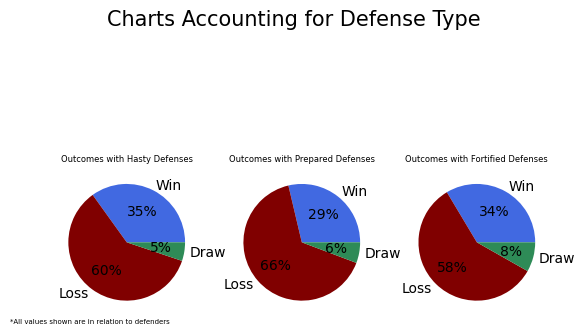

In [9]:
#Creating pie chart for wins and losses accounting for training and defense type individually
plt.subplot(1,3,1)
plt.pie(hasty_wld,labels = ['Win','Loss','Draw'], autopct='%.0f%%',colors=['royalblue','maroon','seagreen'])
plt.title('Outcomes with Hasty Defenses', fontsize = 6)
plt.text(-2,-1.4,'*All values shown are in relation to defenders',fontsize = 5)
plt.subplot(1,3,2)
plt.pie(prep_wld,labels = ['Win','Loss','Draw'], autopct='%.0f%%', colors =['royalblue','maroon','seagreen'])
plt.title('Outcomes with Prepared Defenses', fontsize = 6)
plt.subplot(1,3,3)
plt.pie(fort_wld,labels = ['Win','Loss','Draw'], autopct='%.0f%%', colors =['royalblue','maroon','seagreen'])
plt.title('Outcomes with Fortified Defenses', fontsize = 6)
plt.suptitle('Charts Accounting for Defense Type',fontsize = 15)

In all cases, it is very clear that when engaging in a battle, regardless of the defensive posture, if a force is on the defense they stand a much worse chance of winning an engagement. Though surprisingly, the win rate for defenders in a hasty defence is significantly higher that I would have thought. The hasty defense occurs when defenders have little time to prepare against an enemy attack, and may be characterized (in modern senses) by shallow fighting holes or improvised cover and concealment.

Text(0.5, 0.98, 'Charts Accounting for Training Disadvantage')

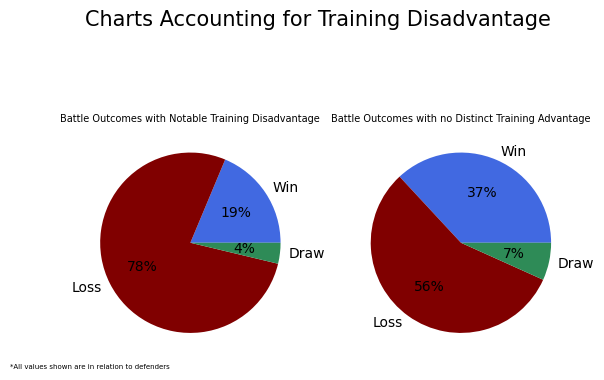

In [10]:
plt.subplot(1,2,1)
plt.pie(trdis_wld,labels = ['Win','Loss','Draw'], autopct='%.0f%%',colors=['royalblue','maroon','seagreen'])
plt.title('Battle Outcomes with Notable Training Disadvantage', fontsize=7)
plt.text(-2,-1.4,'*All values shown are in relation to defenders',fontsize = 5)
plt.subplot(1,2,2)
plt.pie(trndis_wld,labels = ['Win','Loss','Draw'], autopct='%.0f%%',colors=['royalblue','maroon','seagreen'])
plt.title('Battle Outcomes with no Distinct Training Advantage', fontsize=7)
plt.suptitle('Charts Accounting for Training Disadvantage',fontsize = 15)

The charts here confirm what would likely be assumed, that less experienced and trained troops will not fair well against their better trained counterparts. We can see here that when there was no apparent disparity in levels of training, the defenders won nearly twice as many battles. 

In [18]:
#Creating dfs accounting for both defense type and training disadvantage
hasty_trdis= battles_refined[(battles_refined['post1']=='HD') & (battles_refined['trnga'] != 0)]
hasty_ntrdis= battles_refined[(battles_refined['post1']=='HD') & (battles_refined['trnga'] == 0)]
prep_trdis= battles_refined[(battles_refined['post1']=='PD') & (battles_refined['trnga'] != 0)]
prep_ntrdis= battles_refined[(battles_refined['post1']=='PD') & (battles_refined['trnga'] == 0)]
fort_trdis= battles_refined[(battles_refined['post1']=='FD') & (battles_refined['trnga'] != 0)]
fort_ntrdis= battles_refined[(battles_refined['post1']=='FD') & (battles_refined['trnga'] == 0)]

#Getting win,loss,draw values for each
has_tr_wld = pd.Series([hasty_trdis['wina'].value_counts()['W'],hasty_trdis['wina'].value_counts()['L'],hasty_trdis['wina'].value_counts()['D']])
has_ntr_wld = pd.Series([hasty_ntrdis['wina'].value_counts()['W'],hasty_ntrdis['wina'].value_counts()['L'],hasty_ntrdis['wina'].value_counts()['D']])
prep_tr_wld = pd.Series([prep_trdis['wina'].value_counts()['W'],prep_trdis['wina'].value_counts()['L'],prep_trdis['wina'].value_counts()['D']])
prep_ntr_wld = pd.Series([prep_ntrdis['wina'].value_counts()['W'],prep_ntrdis['wina'].value_counts()['L'],prep_ntrdis['wina'].value_counts()['D']])
fort_tr_wld = pd.Series([fort_trdis['wina'].value_counts()['W'],fort_trdis['wina'].value_counts()['L']])
fort_ntr_wld = pd.Series([fort_ntrdis['wina'].value_counts()['W'],fort_ntrdis['wina'].value_counts()['L'],fort_ntrdis['wina'].value_counts()['D']])

Text(0.5, 0.98, 'Charts Accounting for both Defense Type and Training Disadvantage')

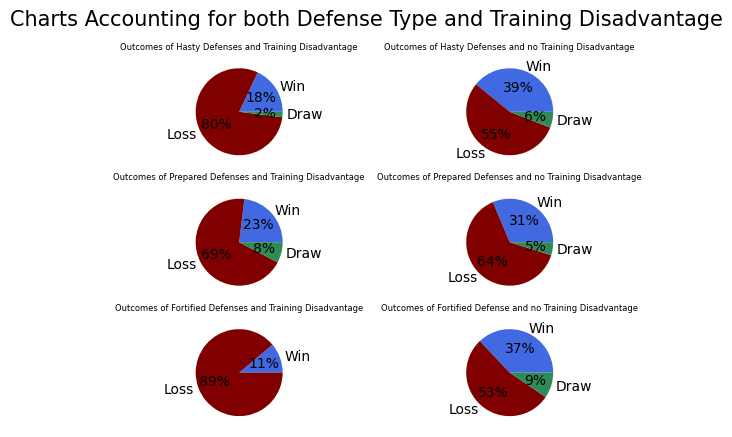

In [28]:
#Creating pie charts for above
plt.subplot(3,2,1)
plt.pie(has_tr_wld, labels = ['Win','Loss','Draw'], autopct='%.0f%%',colors = ['royalblue','maroon','seagreen'])
plt.title('Outcomes of Hasty Defenses and Training Disadvantage', fontsize = 6)
plt.subplot(3,2,2)
plt.pie(has_ntr_wld, labels = ['Win','Loss','Draw'], autopct='%.0f%%',colors = ['royalblue','maroon','seagreen'])
plt.title('Outcomes of Hasty Defenses and no Training Disadvantage', fontsize = 6)
plt.subplot(3,2,3)
plt.pie(prep_tr_wld, labels = ['Win','Loss','Draw'], autopct='%.0f%%',colors = ['royalblue','maroon','seagreen'])
plt.title('Outcomes of Prepared Defenses and Training Disadvantage', fontsize = 6)
plt.subplot(3,2,4)
plt.pie(prep_ntr_wld, labels = ['Win','Loss','Draw'], autopct='%.0f%%',colors = ['royalblue','maroon','seagreen'])
plt.title('Outcomes of Prepared Defenses and no Training Disadvantage', fontsize = 6)
plt.subplot(3,2,5)
plt.pie(fort_tr_wld, labels = ['Win','Loss'], autopct='%.0f%%',colors = ['royalblue','maroon'])
plt.title('Outcomes of Fortified Defenses and Training Disadvantage', fontsize = 6)
plt.subplot(3,2,6)
plt.pie(fort_ntr_wld, labels = ['Win','Loss','Draw'], autopct='%.0f%%',colors = ['royalblue','maroon','seagreen'])
plt.title('Outcomes of Fortified Defense and no Training Disadvantage', fontsize = 6)
plt.suptitle('Charts Accounting for both Defense Type and Training Disadvantage',fontsize = 15)


Finally, pie charts were made separating situations based on both defensive posture and training disadvantage. It can be seen that regardless of defensive posture, training disadvantage once again proves to be a pivotal aspect of winning any engagement. By far the worst situation that an untrained force would face is holding a fortified position. I would attribute the high loss rate in all situations to the fact that the attackers often choose when to engage their enemy, basing the decision off of many factors, and will only take fights that they are confident they can win. Higher win rates during hasty defences may be explained by attackers that underestimated their opponent and are more likely to make riskier, split second decisions.

### **Impact and Conclusion**

Overall, I feel that useful information can be derived from these findings. The advice that I would give to an untrained or undertrained possibly civilian force is to avoid engagements in which they will be facing off against foes who are professionally trained. Alternately, a tactic that has proven successful througout history is that of guerilla warfare (affirmed throughout this research), if untrained troops are able to gain the element of surprise and choose the fights that they take, these results would prove that more often than not, they will likely walk away victorious. If Ukrainian forces decided to use these findings, they could better choose when they withdraw or hold their ground, hopefully saving lives of those fighting for a free Ukraine. The largest negative impact of this research is that those with good intentions may not be the only ones to utilize it, and bad actors are just as likely to put these tactics to practice. If I were to conduct further research into this area, I would utilize some of the other factors such as surprise, terrain and weather alongside predictive models such as logarithmic regression. 

### **References**

Dataset link:
https://www.kaggle.com/datasets/residentmario/database-of-battles?select=battles.csv

https://www.trngcmd.marines.mil/Portals/207/Docs/FMTBE/Student%20Materials/MCECST/E_Defensive_Fundamentals_PP.pdf?ver=g-eVj1nFmg3A32RprOX_Hw%3D%3D

https://www.britannica.com/topic/guerrilla-warfare/The-post-Cold-War-period
